# Principal Component Analysis - From Scratch Implementation

**Author**: Nelson Masbayi

---

In this notebook, implement PCA from scratch using NumPy, following the mathematical foundations established in the theoretical analysis. Build a complete, production-ready implementation and validate it against known results.

## Table of Contents

1. [Implementation Overview](#implementation-overview)
2. [Core PCA Implementation](#core-pca-implementation)
3. [Testing and Validation](#testing-and-validation)
4. [Synthetic Data Experiments](#synthetic-data-experiments)
5. [Performance Comparison](#performance-comparison)
6. [Advanced Features](#advanced-features)

In [32]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification, load_iris
from sklearn.decomposition import PCA as SklearnPCA
from sklearn.preprocessing import StandardScaler
import sys
import os
import time
import warnings
warnings.filterwarnings('ignore')

# Add src directory to the path
sys.path.append('../src')
from pca_implementation import PCA, my_pca, plot_explained_variance

# Set style for better visualizations
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.size'] = 12

# Set random seed for reproducibility
np.random.seed(42)

print("✅ All imports successful!")
print(f"NumPy version: {np.__version__}")

✅ All imports successful!
NumPy version: 2.2.6


## Implementation Overview

The PCA implementation follows these key steps:

1. **Data Centering**: Subtract the mean from each feature
2. **Covariance Calculation**: Compute the covariance matrix
3. **Eigen decomposition**: Find eigenvalues and eigenvectors
4. **Component Selection**: Sort and select top components
5. **Data Projection**: Transform data to PC space

### Mathematical Foundation Recap

Given centered data $\tilde{X}$, we solve:
$\max_{\mathbf{w}} \mathbf{w}^T \mathbf{C} \mathbf{w} \quad \text{subject to} \quad \|\mathbf{w}\| = 1$

Where $\mathbf{C} = \frac{1}{n-1}\tilde{X}^T\tilde{X}$ is the covariance matrix.

The solution is the eigen decomposition: $\mathbf{C}\mathbf{v} = \lambda\mathbf{v}$

## Core PCA Implementation

First, test the simple `my_pca` function that matches the lab requirements:

In [33]:
# Create simple test data
np.random.seed(42)
n_samples, n_features = 100, 4

# Generate data with correlation structure
mean = [0, 0, 0, 0]
cov = [[2.0, 1.5, 1.0, 0.5],
       [1.5, 2.0, 1.2, 0.8],
       [1.0, 1.2, 1.5, 0.6],
       [0.5, 0.8, 0.6, 1.0]]

X_test = np.random.multivariate_normal(mean, cov, n_samples)

print("Test Data Shape:", X_test.shape)
print("\nSample covariance matrix:")
print(np.cov(X_test.T))

Test Data Shape: (100, 4)

Sample covariance matrix:
[[1.65379654 1.06500647 0.74355196 0.32898402]
 [1.06500647 1.54334705 0.86885619 0.6286941 ]
 [0.74355196 0.86885619 1.26835786 0.37496475]
 [0.32898402 0.6286941  0.37496475 0.83912127]]


In [34]:
# Test the simple PCA function
X_projected, components, explained_variance = my_pca(X_test, n_components=2)

print("PCA Results:")
print(f"Original data shape: {X_test.shape}")
print(f"Projected data shape: {X_projected.shape}")
print(f"Components shape: {components.shape}")
print(f"Explained variance: {explained_variance}")
print(f"Explained variance ratio: {explained_variance / np.sum(explained_variance)}")

# Verify components are unit vectors
print("\nComponent norms (should be 1.0):")
for i in range(components.shape[1]):
    norm = np.linalg.norm(components[:, i])
    print(f"Component {i+1}: {norm:.6f}")

PCA Results:
Original data shape: (100, 4)
Projected data shape: (100, 2)
Components shape: (4, 2)
Explained variance: [3.52660591 0.80787195]
Explained variance ratio: [0.81361724 0.18638276]

Component norms (should be 1.0):
Component 1: 1.000000
Component 2: 1.000000


### Full PCA Class Implementation

Now, test the full PCA class:

In [35]:
# Test the full PCA class
pca = PCA(n_components=2)
X_transformed = pca.fit_transform(X_test)

print("Full PCA Class Results:")
print(f"Transformed shape: {X_transformed.shape}")
print(f"Components shape: {pca.components_.shape}")
print(f"Explained variance: {pca.explained_variance_}")
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Cumulative variance explained: {np.sum(pca.explained_variance_ratio_):.3f}")

# Test inverse transform
X_reconstructed = pca.inverse_transform(X_transformed)
reconstruction_error = np.mean((X_test - X_reconstructed) ** 2)
print(f"\nReconstruction error (MSE): {reconstruction_error:.6f}")

Full PCA Class Results:
Transformed shape: (100, 2)
Components shape: (2, 4)
Explained variance: [3.52660591 0.80787195]
Explained variance ratio: [0.81361724 0.18638276]
Cumulative variance explained: 1.000

Reconstruction error (MSE): 0.240111


## Testing and Validation

Next, validate the implementation against scikit-learn:

In [36]:
# Compare with scikit-learn
sklearn_pca = SklearnPCA(n_components=2)
X_sklearn = sklearn_pca.fit_transform(X_test)

print("Comparison with Scikit-learn:")
print("\nExplained Variance:")
print(f"Our implementation: {pca.explained_variance_}")
print(f"Scikit-learn:       {sklearn_pca.explained_variance_}")
print(f"Difference:         {np.abs(pca.explained_variance_ - sklearn_pca.explained_variance_)}")

print("\nExplained Variance Ratio:")
print(f"Our implementation: {pca.explained_variance_ratio_}")
print(f"Scikit-learn:       {sklearn_pca.explained_variance_ratio_}")
print(f"Difference:         {np.abs(pca.explained_variance_ratio_ - sklearn_pca.explained_variance_ratio_)}")

# Check correlation of transformed data (should be ±1 due to possible sign flips)
print("\nCorrelation of transformed data:")
for i in range(X_transformed.shape[1]):
    corr = np.corrcoef(X_transformed[:, i], X_sklearn[:, i])[0, 1]
    print(f"Component {i+1}: {corr:.6f}")

Comparison with Scikit-learn:

Explained Variance:
Our implementation: [3.52660591 0.80787195]
Scikit-learn:       [3.52660591 0.80787195]
Difference:         [8.8817842e-16 8.8817842e-16]

Explained Variance Ratio:
Our implementation: [0.81361724 0.18638276]
Scikit-learn:       [0.66481748 0.15229584]
Difference:         [0.14879976 0.03408693]

Correlation of transformed data:
Component 1: 1.000000
Component 2: 1.000000


## Synthetic Data Experiments

Create synthetic data with known structure to visualize how PCA works:

In [37]:
# Generate 2D data with clear correlation structure
np.random.seed(123)
n_points = 300

# Create elliptical data
theta = np.linspace(0, 2*np.pi, n_points)
x = 3 * np.cos(theta) + np.random.normal(0, 0.3, n_points)
y = 1 * np.sin(theta) + np.random.normal(0, 0.2, n_points)

# Rotate the data
rotation_angle = np.pi / 6  # 30 degrees
rotation_matrix = np.array([[np.cos(rotation_angle), -np.sin(rotation_angle)],
                           [np.sin(rotation_angle), np.cos(rotation_angle)]])

data_2d = np.column_stack([x, y]) @ rotation_matrix.T

# Add offset
data_2d += [2, 1]

print(f"Synthetic 2D data shape: {data_2d.shape}")
print(f"Data range: X=[{data_2d[:, 0].min():.2f}, {data_2d[:, 0].max():.2f}], Y=[{data_2d[:, 1].min():.2f}, {data_2d[:, 1].max():.2f}]")

Synthetic 2D data shape: (300, 2)
Data range: X=[-1.03, 5.17], Y=[-1.21, 3.15]


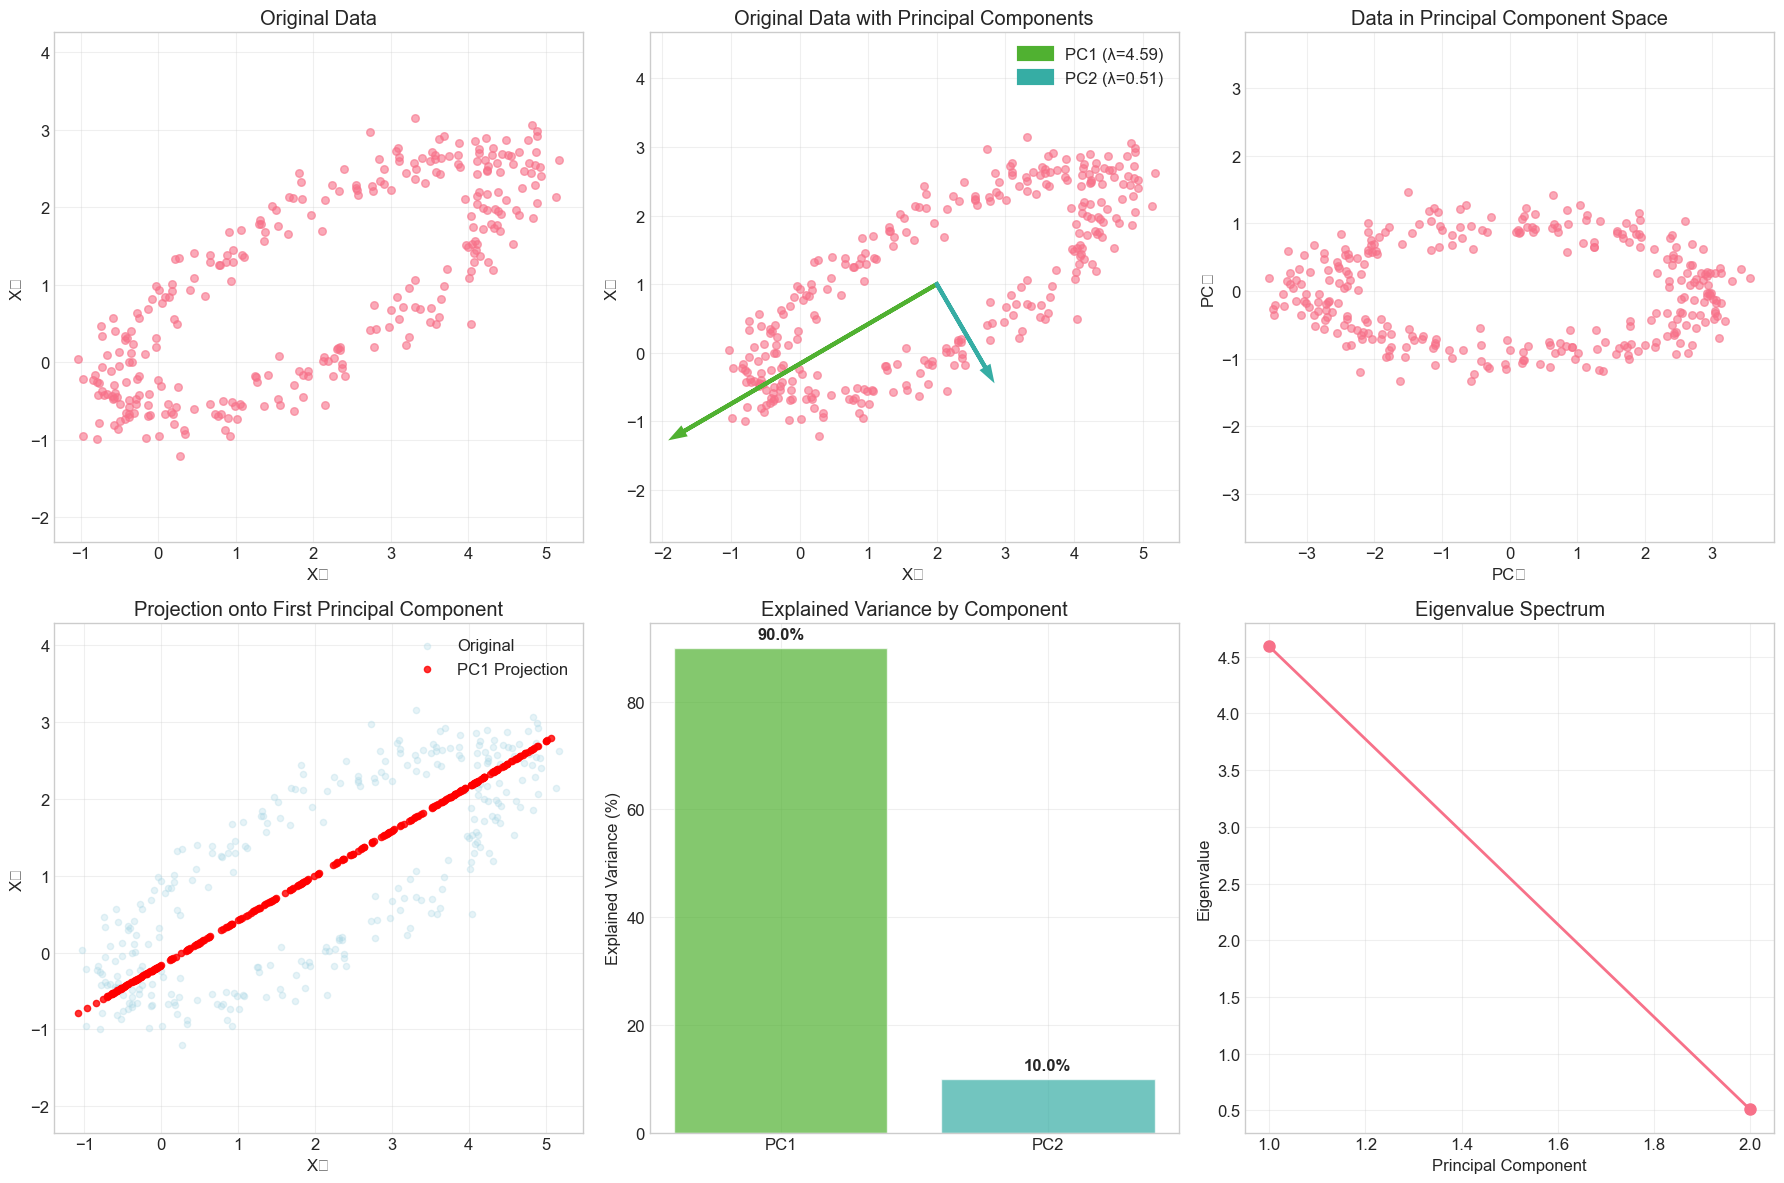

Explained variance ratios: [0.90019383 0.09980617]
Total variance explained: 1.000
PC1 explains 90.0% of variance
PC2 explains 10.0% of variance


In [38]:
# Apply PCA to synthetic data
pca_2d = PCA(n_components=2)
data_2d_pca = pca_2d.fit_transform(data_2d)

# Create comprehensive visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Plot 1: Original data
axes[0, 0].scatter(data_2d[:, 0], data_2d[:, 1], alpha=0.6, s=30)
axes[0, 0].set_title('Original Data')
axes[0, 0].set_xlabel('X₁')
axes[0, 0].set_ylabel('X₂')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].axis('equal')

# Plot 2: Original data with principal components
axes[0, 1].scatter(data_2d[:, 0], data_2d[:, 1], alpha=0.6, s=30)
center = pca_2d.mean_
for i, (component, variance) in enumerate(zip(pca_2d.components_, pca_2d.explained_variance_)):
    scale = np.sqrt(variance) * 2
    axes[0, 1].arrow(center[0], center[1],
                     component[0] * scale, component[1] * scale,
                     head_width=0.1, head_length=0.15,
                     fc=f'C{i+2}', ec=f'C{i+2}',
                     linewidth=3, label=f'PC{i+1} (λ={variance:.2f})')

axes[0, 1].set_title('Original Data with Principal Components')
axes[0, 1].set_xlabel('X₁')
axes[0, 1].set_ylabel('X₂')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].axis('equal')

# Plot 3: Transformed data (PC space)
axes[0, 2].scatter(data_2d_pca[:, 0], data_2d_pca[:, 1], alpha=0.6, s=30)
axes[0, 2].set_title('Data in Principal Component Space')
axes[0, 2].set_xlabel('PC₁')
axes[0, 2].set_ylabel('PC₂')
axes[0, 2].grid(True, alpha=0.3)
axes[0, 2].axis('equal')

# Plot 4: Projection onto first PC only
pc1_projection = data_2d_pca[:, 0:1] @ pca_2d.components_[0:1, :] + pca_2d.mean_
axes[1, 0].scatter(data_2d[:, 0], data_2d[:, 1], alpha=0.3, s=20, label='Original', color='lightblue')
axes[1, 0].scatter(pc1_projection[:, 0], pc1_projection[:, 1], alpha=0.8, s=20, label='PC1 Projection', color='red')
axes[1, 0].set_title('Projection onto First Principal Component')
axes[1, 0].set_xlabel('X₁')
axes[1, 0].set_ylabel('X₂')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].axis('equal')

# Plot 5: Explained variance
components = ['PC1', 'PC2']
variance_ratios = pca_2d.explained_variance_ratio_ * 100
bars = axes[1, 1].bar(components, variance_ratios, color=['C2', 'C3'], alpha=0.7)
axes[1, 1].set_title('Explained Variance by Component')
axes[1, 1].set_ylabel('Explained Variance (%)')
axes[1, 1].grid(True, alpha=0.3)

# Add percentage labels on bars
for bar, percentage in zip(bars, variance_ratios):
    axes[1, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                    f'{percentage:.1f}%', ha='center', va='bottom', fontweight='bold')

# Plot 6: Eigenvalue spectrum
eigenvalues = pca_2d.explained_variance_
axes[1, 2].plot(range(1, len(eigenvalues) + 1), eigenvalues, 'o-', linewidth=2, markersize=8)
axes[1, 2].set_title('Eigenvalue Spectrum')
axes[1, 2].set_xlabel('Principal Component')
axes[1, 2].set_ylabel('Eigenvalue')
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Explained variance ratios: {pca_2d.explained_variance_ratio_}")
print(f"Total variance explained: {np.sum(pca_2d.explained_variance_ratio_):.3f}")
print(f"PC1 explains {pca_2d.explained_variance_ratio_[0]*100:.1f}% of variance")
print(f"PC2 explains {pca_2d.explained_variance_ratio_[1]*100:.1f}% of variance")

### 3D Visualization Example

In [39]:
# Generate 3D data with 2D structure (embedded in 3D)
np.random.seed(456)
n_points = 200

# Create a 2D manifold in 3D space
u = np.random.uniform(-2, 2, n_points)
v = np.random.uniform(-1, 1, n_points)

# Define the manifold
x_3d = u + 0.5 * v + np.random.normal(0, 0.1, n_points)
y_3d = 2 * u - v + np.random.normal(0, 0.1, n_points)
z_3d = 0.5 * u + 2 * v + np.random.normal(0, 0.1, n_points)

data_3d = np.column_stack([x_3d, y_3d, z_3d])

# Apply PCA
pca_3d = PCA(n_components=3)
data_3d_pca = pca_3d.fit_transform(data_3d)

print(f"3D data shape: {data_3d.shape}")
print(f"Explained variance ratios: {pca_3d.explained_variance_ratio_}")
print(f"Cumulative variance: {np.cumsum(pca_3d.explained_variance_ratio_)}")

3D data shape: (200, 3)
Explained variance ratios: [0.81587055 0.18308241 0.00104704]
Cumulative variance: [0.81587055 0.99895296 1.        ]


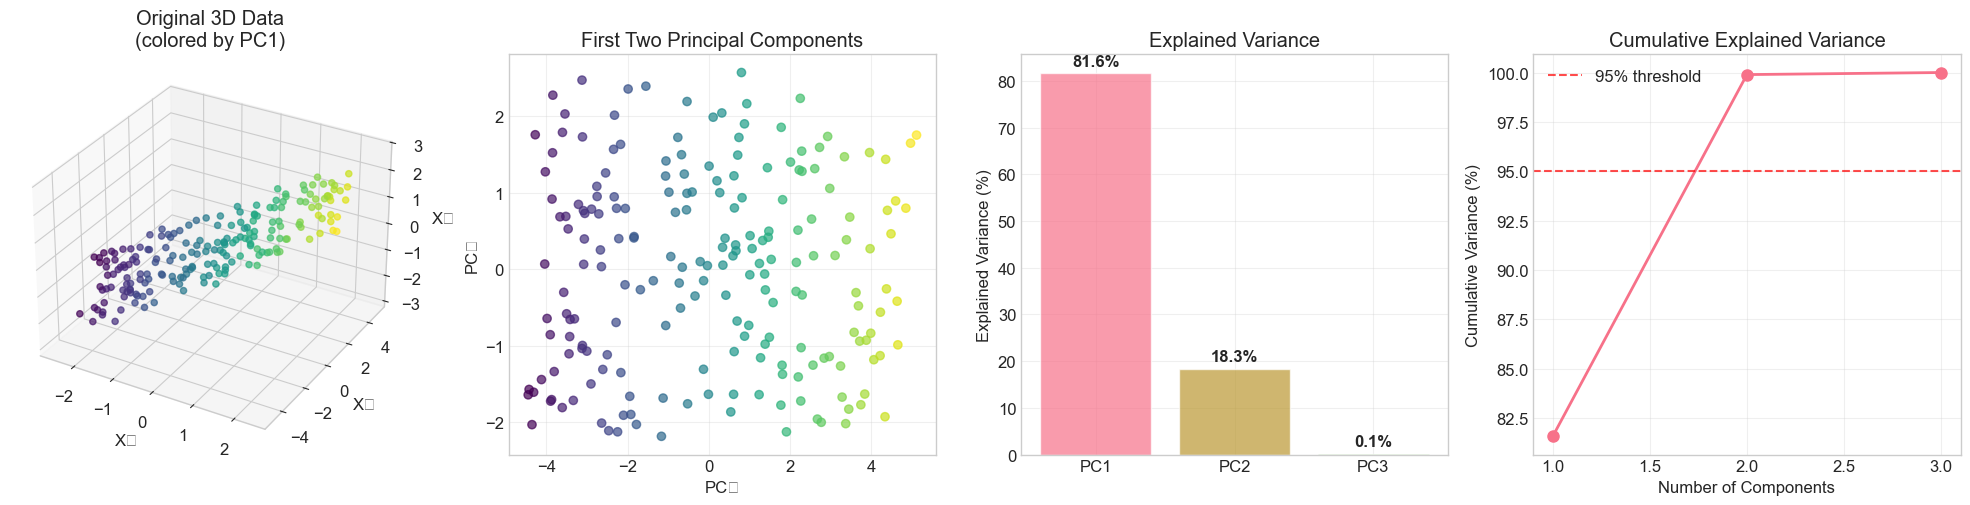


3D PCA Analysis:
First two components explain 99.9% of variance
Third component adds only 0.1% more variance
This suggests the data has approximately 2D structure embedded in 3D space!


In [40]:
# Visualize 3D PCA results
fig = plt.figure(figsize=(20, 5))

# 3D scatter plot of original data
ax1 = fig.add_subplot(141, projection='3d')
scatter = ax1.scatter(data_3d[:, 0], data_3d[:, 1], data_3d[:, 2],
                     c=data_3d_pca[:, 0], cmap='viridis', alpha=0.7)
ax1.set_title('Original 3D Data\n(colored by PC1)')
ax1.set_xlabel('X₁')
ax1.set_ylabel('X₂')
ax1.set_zlabel('X₃')

# 2D projection using the first two PCs
ax2 = fig.add_subplot(142)
scatter2 = ax2.scatter(data_3d_pca[:, 0], data_3d_pca[:, 1],
                      c=data_3d_pca[:, 0], cmap='viridis', alpha=0.7)
ax2.set_title('First Two Principal Components')
ax2.set_xlabel('PC₁')
ax2.set_ylabel('PC₂')
ax2.grid(True, alpha=0.3)

# Explained variance plot
ax3 = fig.add_subplot(143)
components = ['PC1', 'PC2', 'PC3']
variance_ratios = pca_3d.explained_variance_ratio_ * 100
bars = ax3.bar(components, variance_ratios, color=['C0', 'C1', 'C2'], alpha=0.7)
ax3.set_title('Explained Variance')
ax3.set_ylabel('Explained Variance (%)')
ax3.grid(True, alpha=0.3)

for bar, percentage in zip(bars, variance_ratios):
    ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
             f'{percentage:.1f}%', ha='center', va='bottom', fontweight='bold')

# Cumulative explained variance
ax4 = fig.add_subplot(144)
cumulative = np.cumsum(variance_ratios)
ax4.plot(range(1, len(cumulative) + 1), cumulative, 'o-', linewidth=2, markersize=8)
ax4.axhline(y=95, color='red', linestyle='--', alpha=0.7, label='95% threshold')
ax4.set_title('Cumulative Explained Variance')
ax4.set_xlabel('Number of Components')
ax4.set_ylabel('Cumulative Variance (%)')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Analysis
print("\n3D PCA Analysis:")
print(f"First two components explain {cumulative[1]:.1f}% of variance")
print(f"Third component adds only {variance_ratios[2]:.1f}% more variance")
print("This suggests the data has approximately 2D structure embedded in 3D space!")

## Performance Comparison

Compare the performance of the implementation with scikit-learn:


Testing on 100 samples × 10 features...
Our implementation: 0.0029s
Scikit-learn:       0.0039s
Speed ratio:        0.76x
Accuracy match:     True (diff: 1.40e-15)

Testing on 500 samples × 20 features...
Our implementation: 0.0148s
Scikit-learn:       0.0030s
Speed ratio:        4.95x
Accuracy match:     True (diff: 1.55e-15)

Testing on 1000 samples × 50 features...
Our implementation: 0.0312s
Scikit-learn:       0.0044s
Speed ratio:        7.12x
Accuracy match:     True (diff: 2.40e-15)

Testing on 2000 samples × 100 features...
Our implementation: 0.1285s
Scikit-learn:       0.0170s
Speed ratio:        7.56x
Accuracy match:     True (diff: 1.64e-15)


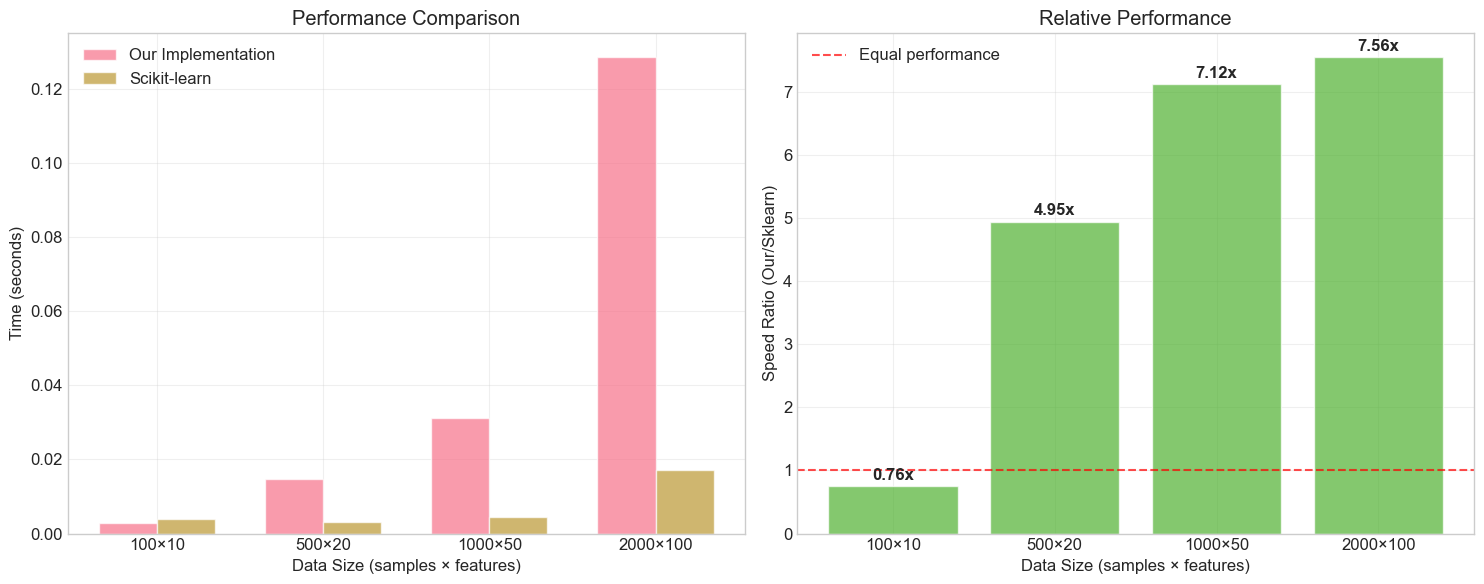


Accuracy matches in all tests: True


In [41]:
# Performance comparison on different data sizes
data_sizes = [(100, 10), (500, 20), (1000, 50), (2000, 100)]
results = {'size': [], 'our_time': [], 'sklearn_time': [], 'accuracy_match': []}

for n_samples, n_features in data_sizes:
    print(f"\nTesting on {n_samples} samples × {n_features} features...")

    # Generate test data
    X_test = np.random.randn(n_samples, n_features)
    n_components = min(5, n_features)

    # Time our implementation
    start_time = time.time()
    our_pca = PCA(n_components=n_components)
    our_result = our_pca.fit_transform(X_test)
    our_time = time.time() - start_time

    # Time scikit-learn
    start_time = time.time()
    sklearn_pca = SklearnPCA(n_components=n_components)
    sklearn_result = sklearn_pca.fit_transform(X_test)
    sklearn_time = time.time() - start_time

    # Check accuracy (explained variance should match)
    variance_diff = np.mean(np.abs(our_pca.explained_variance_ - sklearn_pca.explained_variance_))
    accuracy_match = variance_diff < 1e-10

    # Store results
    results['size'].append(f"{n_samples}×{n_features}")
    results['our_time'].append(our_time)
    results['sklearn_time'].append(sklearn_time)
    results['accuracy_match'].append(accuracy_match)

    print(f"Our implementation: {our_time:.4f}s")
    print(f"Scikit-learn:       {sklearn_time:.4f}s")
    print(f"Speed ratio:        {our_time/sklearn_time:.2f}x")
    print(f"Accuracy match:     {accuracy_match} (diff: {variance_diff:.2e})")

# Create performance visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Time comparison
x_pos = range(len(results['size']))
width = 0.35

ax1.bar([p - width/2 for p in x_pos], results['our_time'], width,
        label='Our Implementation', alpha=0.7, color='C0')
ax1.bar([p + width/2 for p in x_pos], results['sklearn_time'], width,
        label='Scikit-learn', alpha=0.7, color='C1')

ax1.set_xlabel('Data Size (samples × features)')
ax1.set_ylabel('Time (seconds)')
ax1.set_title('Performance Comparison')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(results['size'])
ax1.legend()
ax1.grid(True, alpha=0.3)

# Speed ratio
speed_ratios = [our/sklearn for our, sklearn in zip(results['our_time'], results['sklearn_time'])]
bars = ax2.bar(results['size'], speed_ratios, alpha=0.7, color='C2')
ax2.axhline(y=1, color='red', linestyle='--', alpha=0.7, label='Equal performance')
ax2.set_xlabel('Data Size (samples × features)')
ax2.set_ylabel('Speed Ratio (Our/Sklearn)')
ax2.set_title('Relative Performance')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Add ratio labels
for bar, ratio in zip(bars, speed_ratios):
   ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05,
            f'{ratio:.2f}x', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\nAccuracy matches in all tests: {all(results['accuracy_match'])}")

## Advanced Features

### Different Solver Comparison

The implementation supports both covariance-based and SVD-based PCA. Comparing both:

In [42]:
# Compare different solvers
np.random.seed(789)
X_solver_test = np.random.randn(500, 20)

# Covariance-based PCA
pca_cov = PCA(n_components=5, svd_solver='covariance')
start_time = time.time()
X_cov = pca_cov.fit_transform(X_solver_test)
cov_time = time.time() - start_time

# SVD-based PCA
pca_svd = PCA(n_components=5, svd_solver='svd')
start_time = time.time()
X_svd = pca_svd.fit_transform(X_solver_test)
svd_time = time.time() - start_time

print("Solver Comparison:")
print(f"Covariance method: {cov_time:.4f}s")
print(f"SVD method:        {svd_time:.4f}s")
print(f"Speed ratio:       {cov_time/svd_time:.2f}x")

print("\nExplained Variance Comparison:")
print(f"Covariance: {pca_cov.explained_variance_}")
print(f"SVD:        {pca_svd.explained_variance_}")
print(f"Max diff:   {np.max(np.abs(pca_cov.explained_variance_ - pca_svd.explained_variance_)):.2e}")

# Check correlation of results
print("\nTransformed Data Correlation:")
for i in range(X_cov.shape[1]):
    corr = np.abs(np.corrcoef(X_cov[:, i], X_svd[:, i])[0, 1])
    print(f"Component {i+1}: {corr:.6f}")

Solver Comparison:
Covariance method: 0.0029s
SVD method:        0.0036s
Speed ratio:       0.80x

Explained Variance Comparison:
Covariance: [1.48980884 1.41540071 1.29637432 1.2888145  1.21364007]
SVD:        [1.48980884 1.41540071 1.29637432 1.2888145  1.21364007]
Max diff:   2.22e-15

Transformed Data Correlation:
Component 1: 1.000000
Component 2: 1.000000
Component 3: 1.000000
Component 4: 1.000000
Component 5: 1.000000


### Reconstruction Quality Analysis

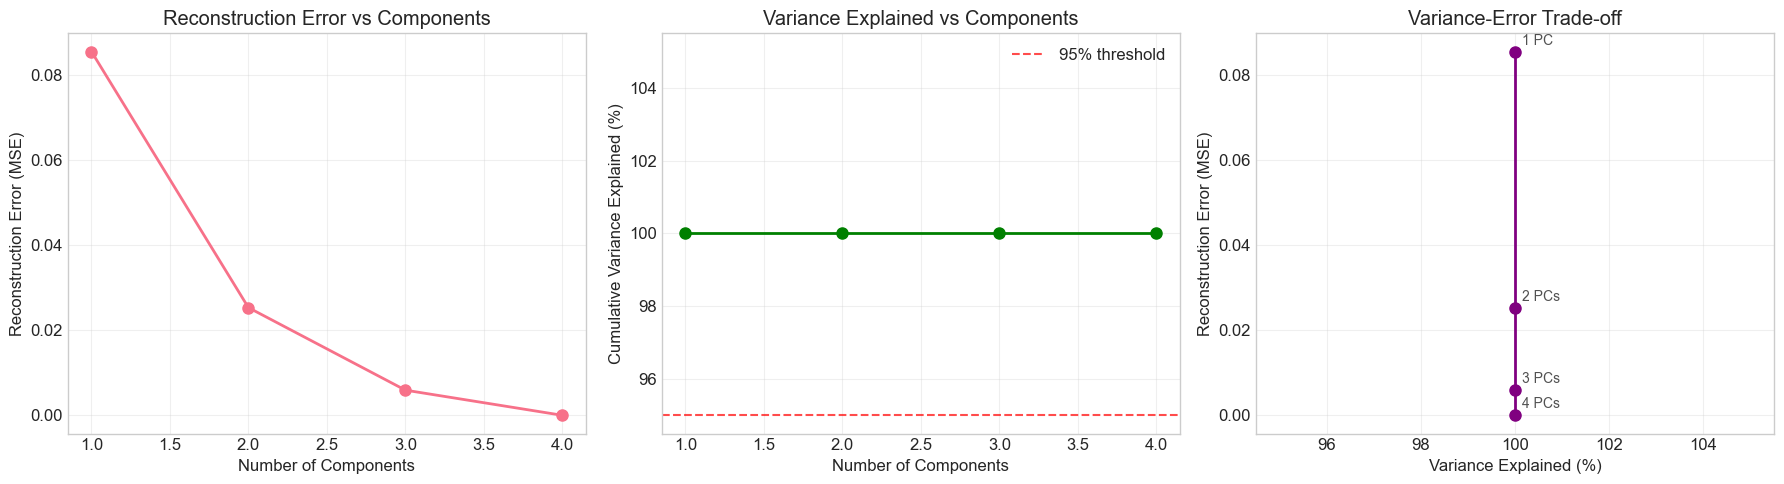

Iris Dataset Reconstruction Analysis:
1 component: 100.0% variance, 0.0856 MSE
2 components: 100.0% variance, 0.0253 MSE
3 components: 100.0% variance, 0.0059 MSE
4 components: 100.0% variance, 0.0000 MSE


In [43]:
# Analyze reconstruction quality with different numbers of components
iris = load_iris()
X_iris = iris.data

# Test different numbers of components
n_components_list = range(1, X_iris.shape[1] + 1)
reconstruction_errors = []
variance_explained = []

for n_comp in n_components_list:
    pca_test = PCA(n_components=n_comp)
    X_transformed = pca_test.fit_transform(X_iris)
    X_reconstructed = pca_test.inverse_transform(X_transformed)

    # Calculate reconstruction error
    error = np.mean((X_iris - X_reconstructed) ** 2)
    reconstruction_errors.append(error)

    # Calculate cumulative variance explained
    variance_explained.append(np.sum(pca_test.explained_variance_ratio_))

# Visualization
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

# Reconstruction error vs components
ax1.plot(n_components_list, reconstruction_errors, 'o-', linewidth=2, markersize=8)
ax1.set_xlabel('Number of Components')
ax1.set_ylabel('Reconstruction Error (MSE)')
ax1.set_title('Reconstruction Error vs Components')
ax1.grid(True, alpha=0.3)

# Variance explained vs components
ax2.plot(n_components_list, np.array(variance_explained) * 100, 'o-',
         linewidth=2, markersize=8, color='green')
ax2.axhline(y=95, color='red', linestyle='--', alpha=0.7, label='95% threshold')
ax2.set_xlabel('Number of Components')
ax2.set_ylabel('Cumulative Variance Explained (%)')
ax2.set_title('Variance Explained vs Components')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Trade-off plot
ax3.plot(np.array(variance_explained) * 100, reconstruction_errors, 'o-',
         linewidth=2, markersize=8, color='purple')
ax3.set_xlabel('Variance Explained (%)')
ax3.set_ylabel('Reconstruction Error (MSE)')
ax3.set_title('Variance-Error Trade-off')
ax3.grid(True, alpha=0.3)

# Add annotations
for i, (var, err, n_comp) in enumerate(zip(variance_explained, reconstruction_errors, n_components_list)):
    if n_comp in [1, 2, 3, 4]:
        ax3.annotate(f'{n_comp} PC{"s" if n_comp > 1 else ""}',
                    (var * 100, err),
                    xytext=(5, 5), textcoords='offset points',
                    fontsize=10, alpha=0.8)

plt.tight_layout()
plt.show()

print("Iris Dataset Reconstruction Analysis:")
for i, (n_comp, var, err) in enumerate(zip(n_components_list, variance_explained, reconstruction_errors)):
    print(f"{n_comp} component{'s' if n_comp > 1 else ''}: {var*100:.1f}% variance, {err:.4f} MSE")

### Feature Importance Analysis

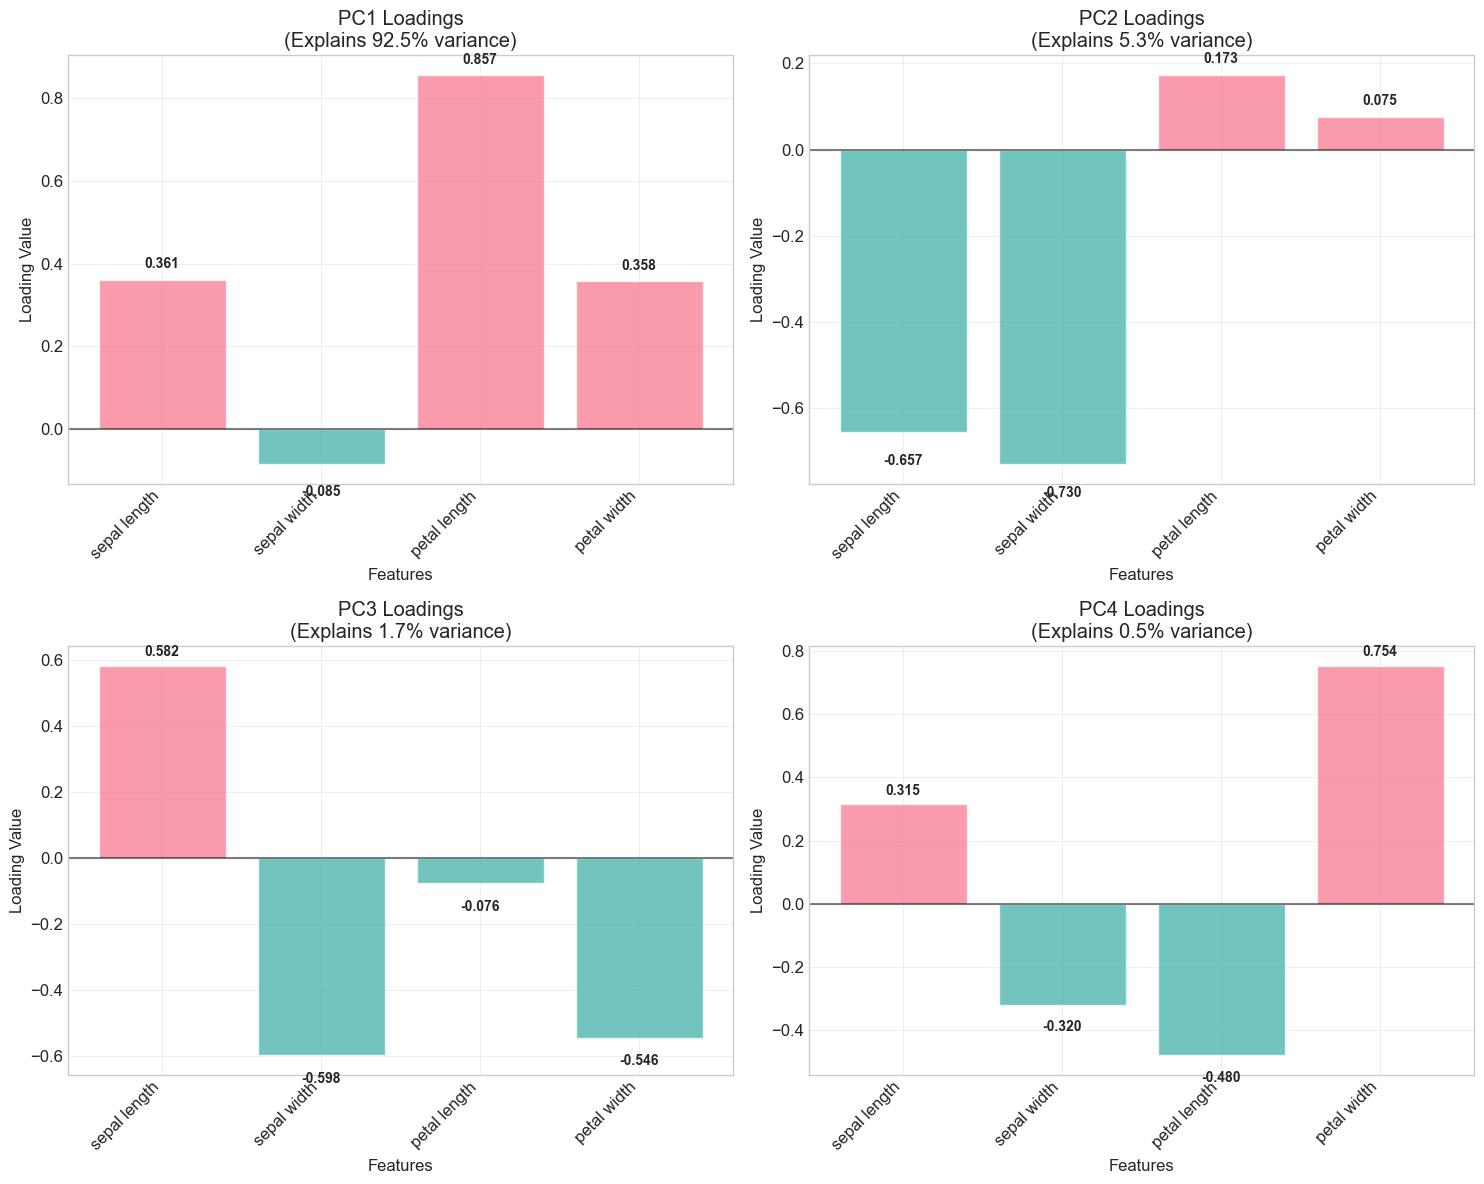

Principal Component Interpretation:

PC1 (92.5% variance):
  Most influential features:
    - petal length (cm) (positively, loading: 0.857)
    - sepal length (cm) (positively, loading: 0.361)

PC2 (5.3% variance):
  Most influential features:
    - sepal width (cm) (negatively, loading: -0.730)
    - sepal length (cm) (negatively, loading: -0.657)

PC3 (1.7% variance):
  Most influential features:
    - sepal width (cm) (negatively, loading: -0.598)
    - sepal length (cm) (positively, loading: 0.582)

PC4 (0.5% variance):
  Most influential features:
    - petal width (cm) (positively, loading: 0.754)
    - petal length (cm) (negatively, loading: -0.480)


In [44]:
# Analyze feature contributions to principal components
pca_iris = PCA(n_components=4)
pca_iris.fit(X_iris)

# Get feature names
feature_names = iris.feature_names

# Create loading matrix visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

for i in range(4):
    # Get loadings for component i
    loadings = pca_iris.components_[i, :]

    # Create bar plot
    bars = axes[i].bar(range(len(feature_names)), loadings,
                      color=['C0' if load >= 0 else 'C3' for load in loadings],
                      alpha=0.7)

    axes[i].set_title(f'PC{i+1} Loadings\n(Explains {pca_iris.explained_variance_ratio_[i]*100:.1f}% variance)')
    axes[i].set_xlabel('Features')
    axes[i].set_ylabel('Loading Value')
    axes[i].set_xticks(range(len(feature_names)))
    axes[i].set_xticklabels([name.replace(' (cm)', '') for name in feature_names],
                           rotation=45, ha='right')
    axes[i].grid(True, alpha=0.3)
    axes[i].axhline(y=0, color='black', linestyle='-', alpha=0.5)

    # Add value labels
    for bar, value in zip(bars, loadings):
        axes[i].text(bar.get_x() + bar.get_width()/2,
                    value + (0.02 if value >= 0 else -0.05),
                    f'{value:.3f}', ha='center', va='bottom' if value >= 0 else 'top',
                    fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# Print interpretation
print("Principal Component Interpretation:")
for i in range(4):
    loadings = pca_iris.components_[i, :]
    dominant_features = np.argsort(np.abs(loadings))[::-1][:2]

    print(f"\nPC{i+1} ({pca_iris.explained_variance_ratio_[i]*100:.1f}% variance):")
    print(f"  Most influential features:")
    for j in dominant_features:
        direction = "positively" if loadings[j] > 0 else "negatively"
        print(f"    - {feature_names[j]} ({direction}, loading: {loadings[j]:.3f})")

## Advanced Synthetic Data Testing

### Test Data Generation Utilities

Testing comprehensive data generation utilities...

1. Testing correlated data generation:
   Generated shape: (200, 4)
   Correlation matrix:
[[1.         0.84442981 0.82668597 0.80286308]
 [0.84442981 1.         0.6666964  0.66528539]
 [0.82668597 0.6666964  1.         0.67530339]
 [0.80286308 0.66528539 0.67530339 1.        ]]


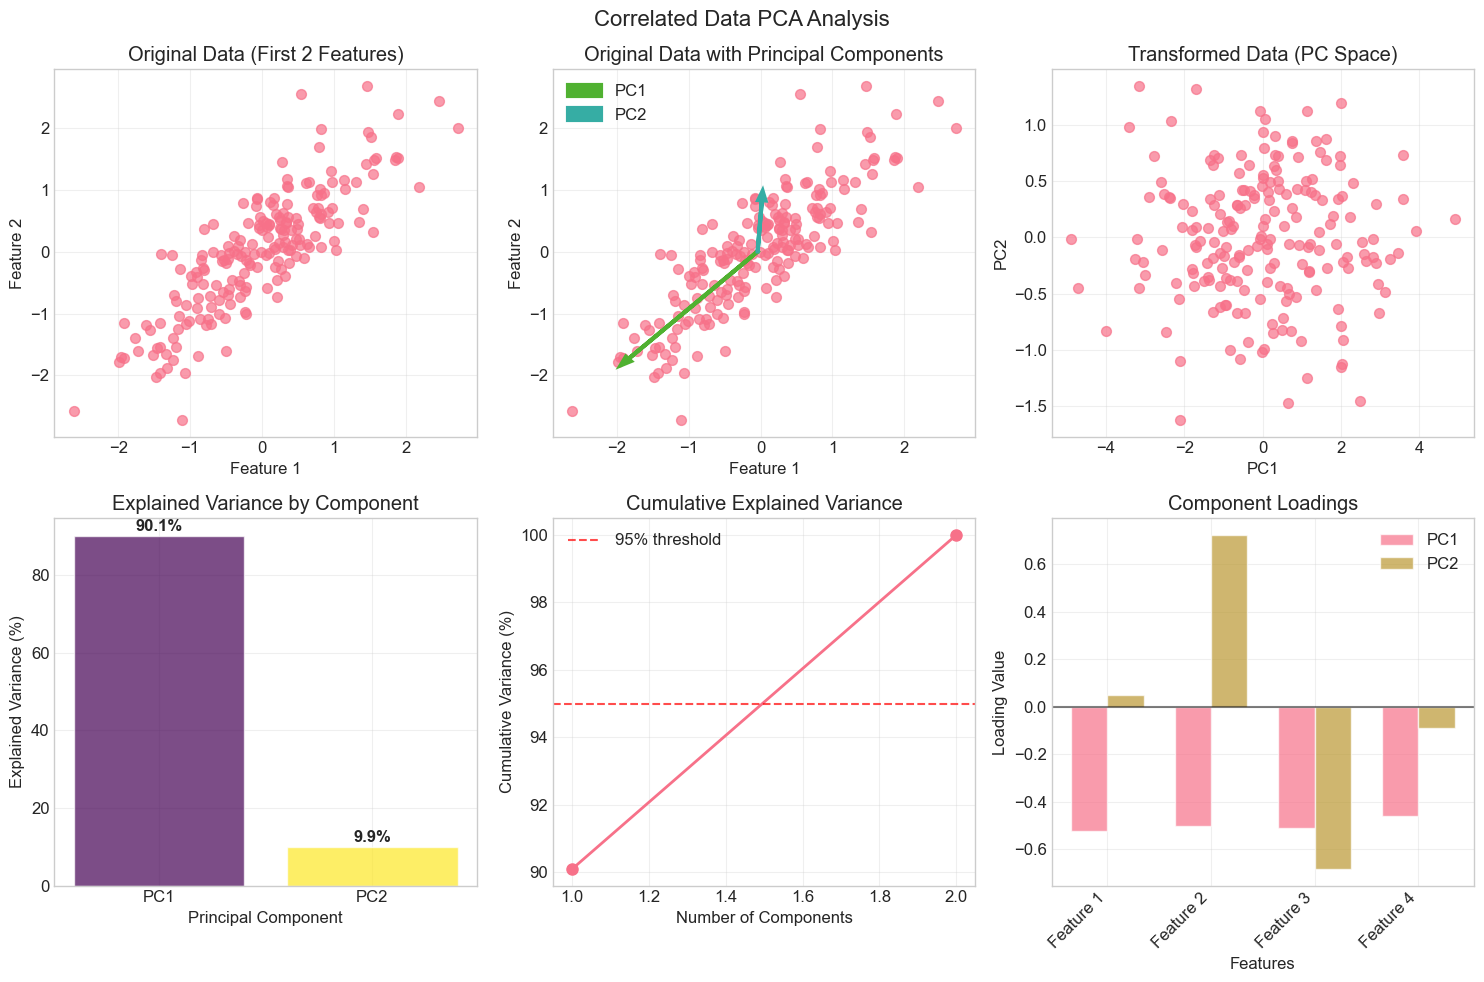

In [45]:
# Import our new utilities
sys.path.append('../src')
from data_utils import *
from visualization_utils import *

print("Testing comprehensive data generation utilities...")

# Test correlated data
print("\n1. Testing correlated data generation:")
X_corr = generate_correlated_data(n_samples=200, n_features=4, correlation=0.85, random_state=42)
print(f"   Generated shape: {X_corr.shape}")
print(f"   Correlation matrix:\n{np.corrcoef(X_corr.T)}")

# Apply PCA and visualize
pca_corr = PCA(n_components=2)
X_corr_pca = pca_corr.fit_transform(X_corr)

plot_2d_pca_results(X_corr, X_corr_pca, pca_corr,
                   title="Correlated Data PCA Analysis",
                   feature_names=[f"Feature {i+1}" for i in range(4)])

### Elliptical Data with Known Structure


2. Testing elliptical data with known principal directions:
   Generated elliptical data shape: (300, 2)
   Explained variance ratios: [0.87853681 0.12146319]
   First PC should align with major axis


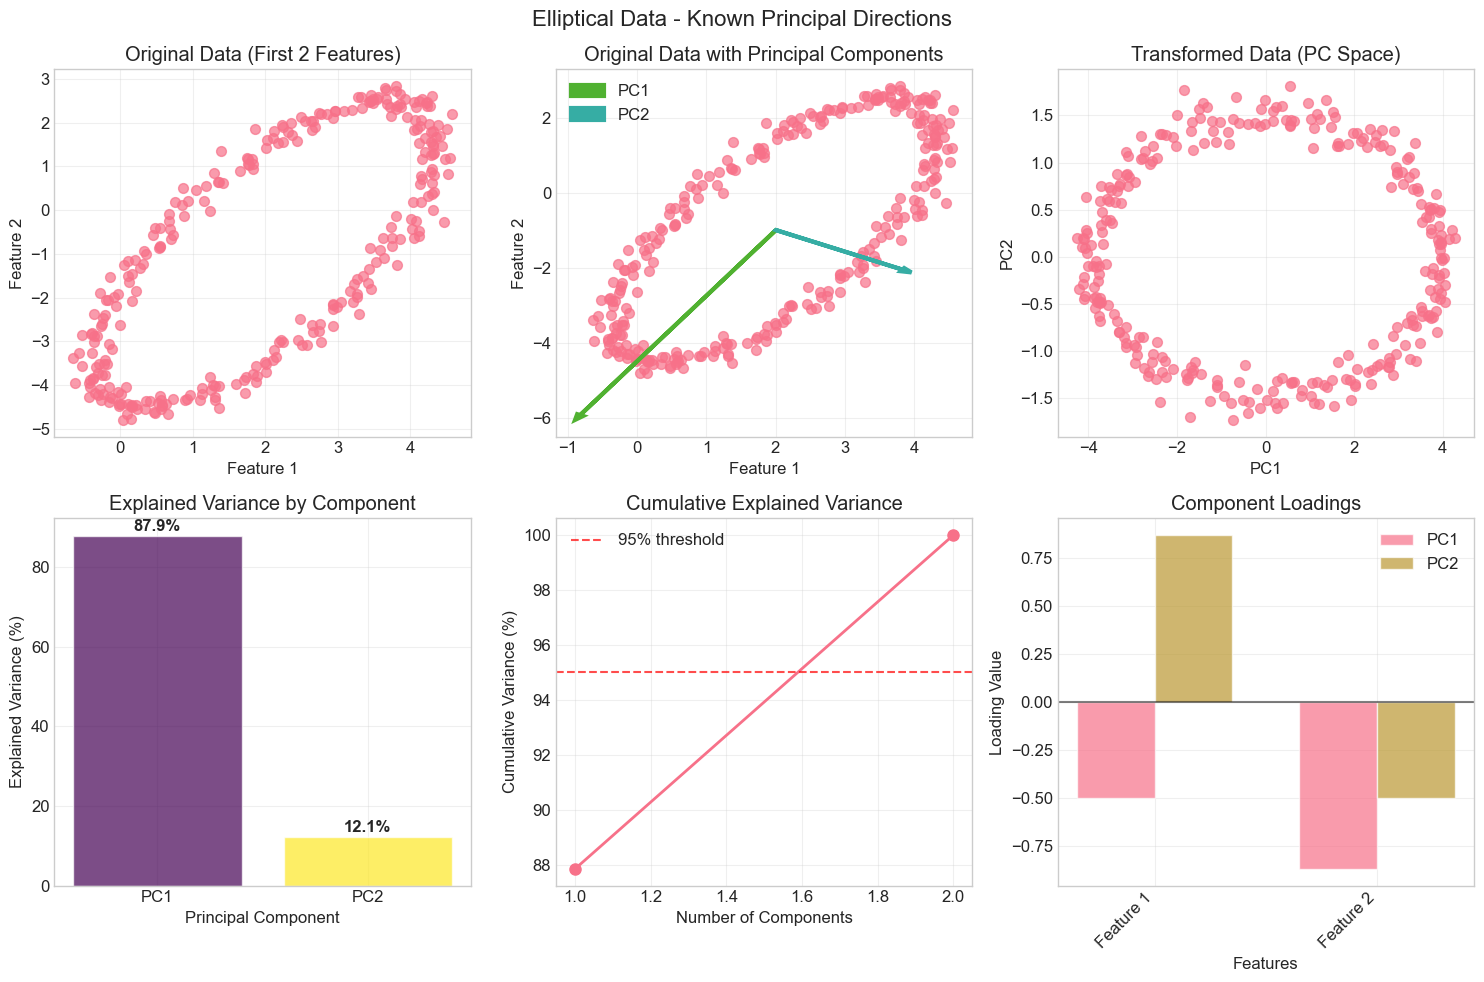

In [46]:
print("\n2. Testing elliptical data with known principal directions:")

# Generate elliptical data with specific parameters
X_ellipse = generate_elliptical_data(
    n_samples=300,
    major_axis=4.0,
    minor_axis=1.5,
    rotation_angle=np.pi/3,  # 60 degrees
    center=(2, -1),
    noise_std=0.15,
    random_state=123
)

print(f"   Generated elliptical data shape: {X_ellipse.shape}")

# Apply PCA
pca_ellipse = PCA(n_components=2)
X_ellipse_pca = pca_ellipse.fit_transform(X_ellipse)

print(f"   Explained variance ratios: {pca_ellipse.explained_variance_ratio_}")
print(f"   First PC should align with major axis")

# Visualize with our new plotting function
plot_2d_pca_results(X_ellipse, X_ellipse_pca, pca_ellipse,
                   title="Elliptical Data - Known Principal Directions")

### 3D Manifold Data


3. Testing 3D manifold data:

   Testing swiss_roll manifold:
   Data shape: (250, 3)
   Explained variance ratios: [0.39950553 0.31625577 0.2842387 ]
   First 2 PCs explain: 71.6%


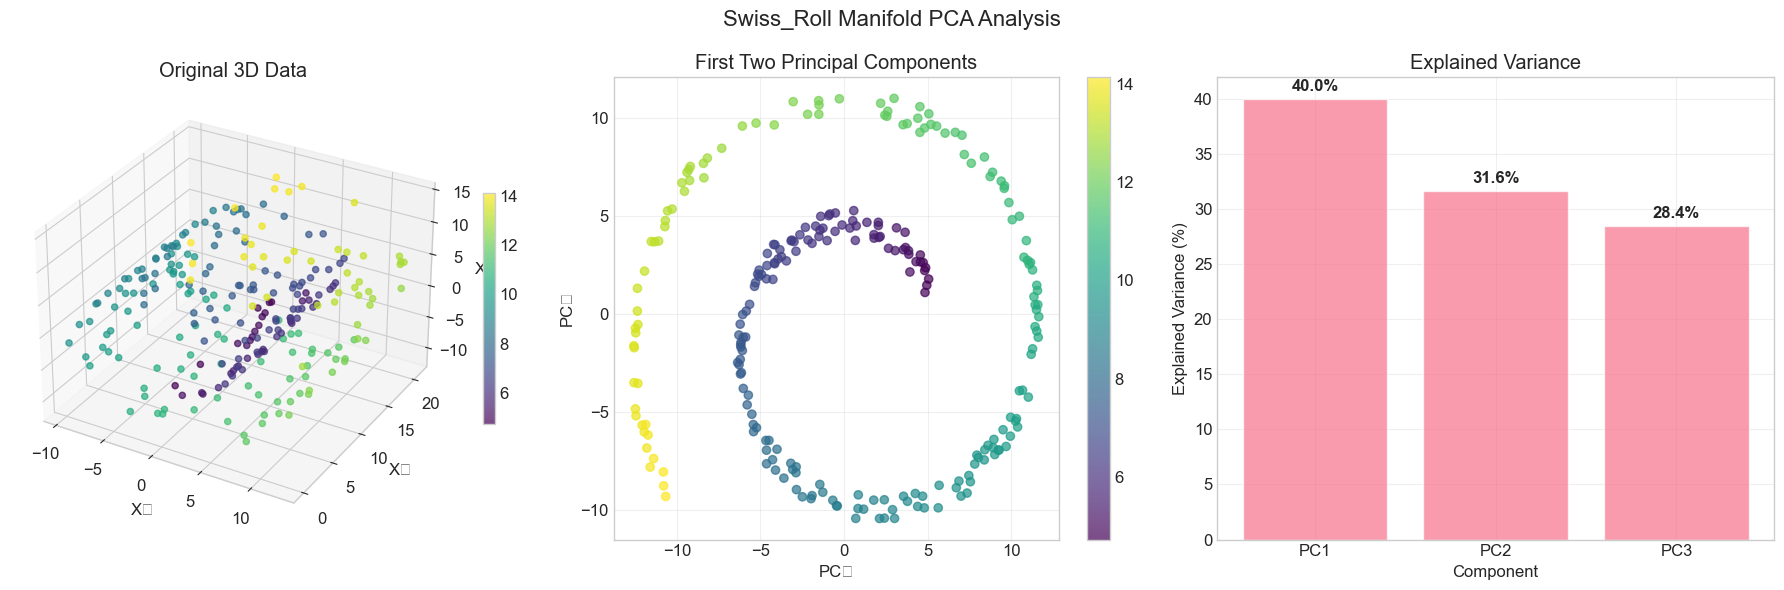


   Testing helix manifold:
   Data shape: (250, 3)
   Explained variance ratios: [0.4457591  0.37668877 0.17755213]
   First 2 PCs explain: 82.2%


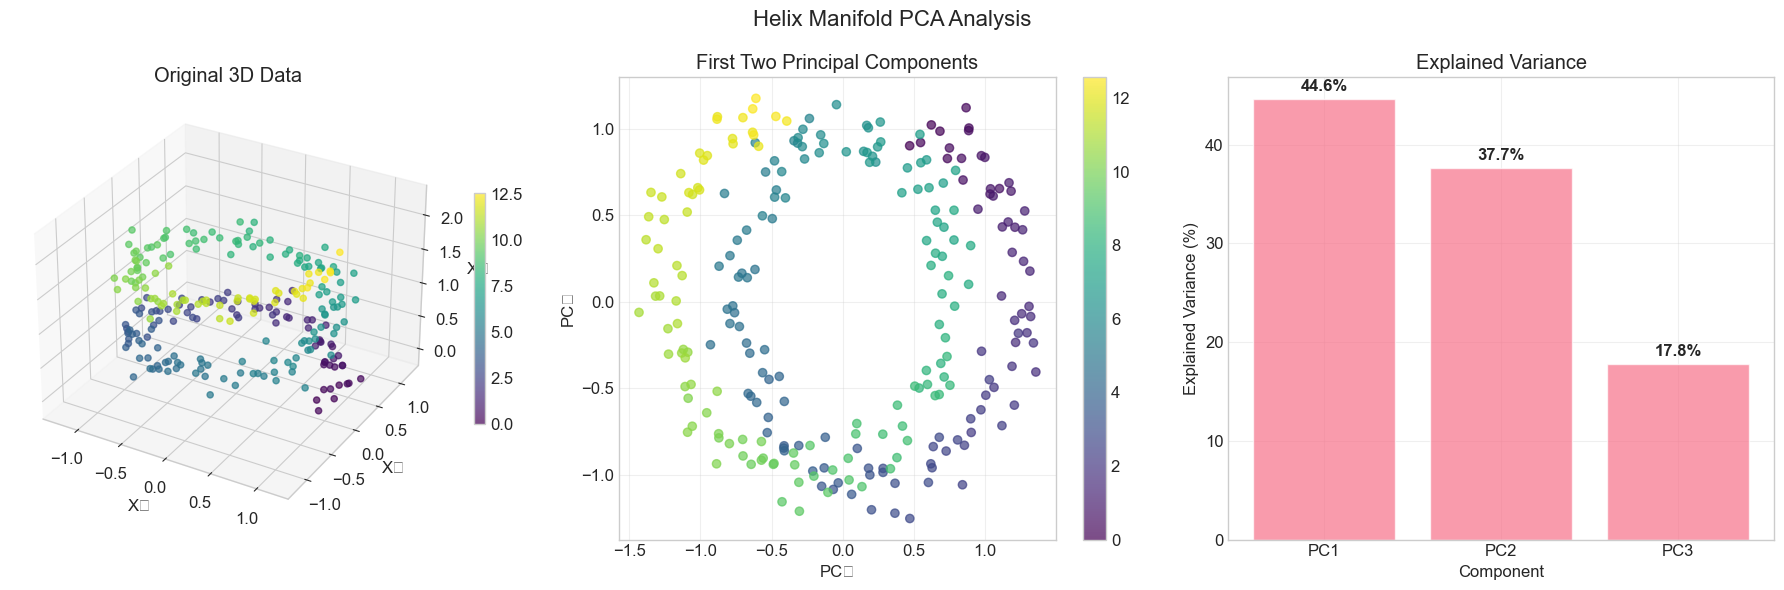


   Testing plane manifold:
   Data shape: (250, 3)
   Explained variance ratios: [0.51819179 0.48114177 0.00066644]
   First 2 PCs explain: 99.9%


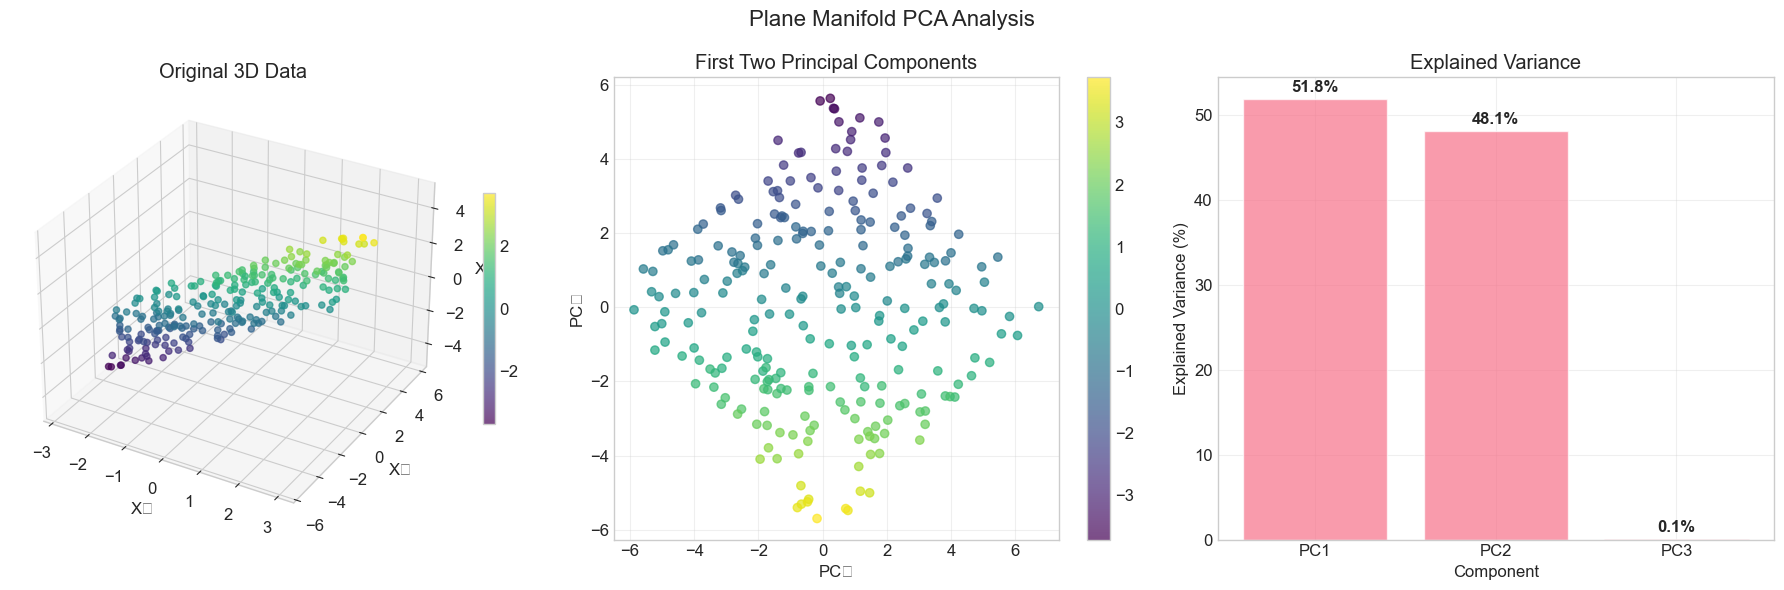

In [47]:
print("\n3. Testing 3D manifold data:")

# Test different manifold types
manifold_types = ['swiss_roll', 'helix', 'plane']

for manifold_type in manifold_types:
    print(f"\n   Testing {manifold_type} manifold:")

    X_3d, colors = generate_3d_manifold(n_samples=250,
                                       manifold_type=manifold_type,
                                       noise_std=0.1,
                                       random_state=456)

    # Apply PCA
    pca_3d = PCA(n_components=3)
    X_3d_pca = pca_3d.fit_transform(X_3d)

    print(f"   Data shape: {X_3d.shape}")
    print(f"   Explained variance ratios: {pca_3d.explained_variance_ratio_}")
    print(f"   First 2 PCs explain: {np.sum(pca_3d.explained_variance_ratio_[:2])*100:.1f}%")

    # Visualize
    plot_3d_pca_results(X_3d, X_3d_pca, pca_3d, labels=colors,
                       title=f"{manifold_type.title()} Manifold PCA Analysis")

### High-Dimensional Data with Low-Dimensional Structure


4. Testing high-dimensional data:
   Generated high-dim data shape: (200, 20)
   Total components: 20
   First 3 components explain: 93.6%
   First 5 components explain: 94.7%


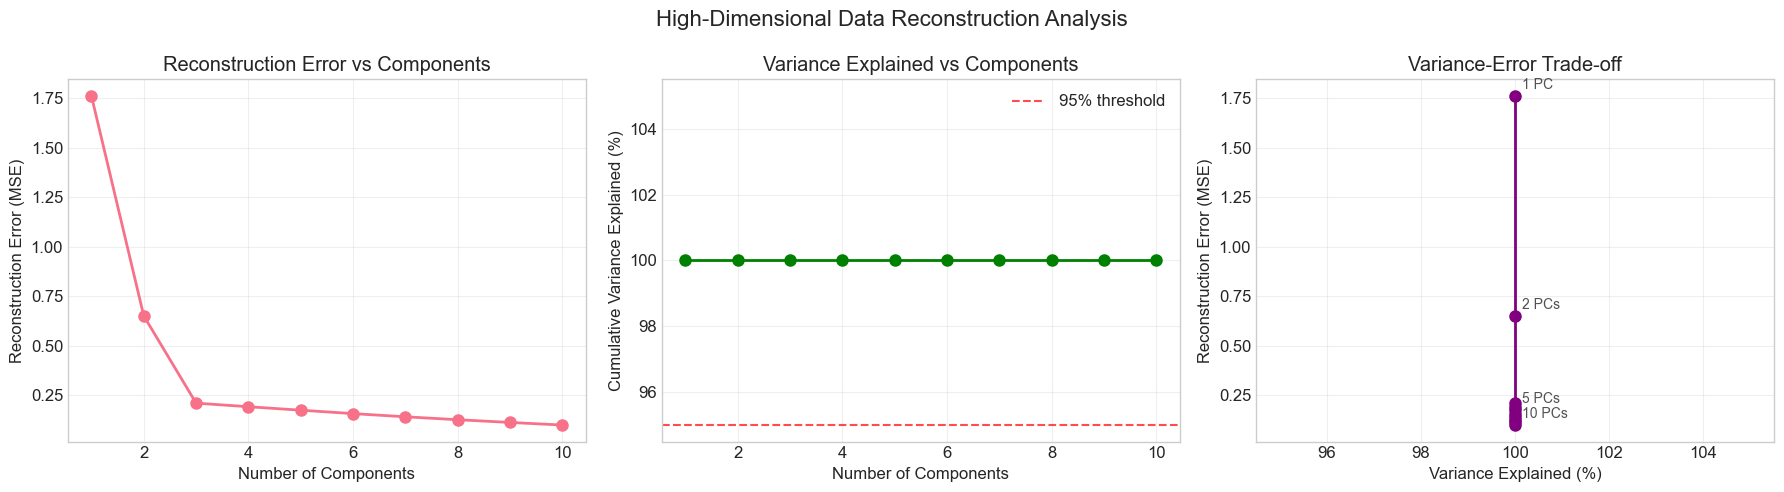

([np.float64(1.7629586636179233),
  np.float64(0.6512129990904605),
  np.float64(0.21019379893064297),
  np.float64(0.1920668599656055),
  np.float64(0.1745371097011594),
  np.float64(0.15724000982375225),
  np.float64(0.14116251627628867),
  np.float64(0.1264196859657218),
  np.float64(0.11260381298143307),
  np.float64(0.09947090036780472)],
 [np.float64(1.0),
  np.float64(1.0),
  np.float64(1.0),
  np.float64(1.0000000000000002),
  np.float64(1.0),
  np.float64(1.0),
  np.float64(1.0),
  np.float64(1.0),
  np.float64(0.9999999999999998),
  np.float64(0.9999999999999999)])

In [49]:
print("\n4. Testing high-dimensional data:")

X_high_dim = generate_high_dimensional_data(
    n_samples=200,
    n_features=20,
    n_informative=3,
    noise_std=0.5,
    random_state=789
)

print(f"   Generated high-dim data shape: {X_high_dim.shape}")

# Apply PCA with different numbers of components
pca_high_dim = PCA()  # Keep all components initially
pca_high_dim.fit(X_high_dim)

print(f"   Total components: {len(pca_high_dim.explained_variance_ratio_)}")
print(f"   First 3 components explain: {np.sum(pca_high_dim.explained_variance_ratio_[:3])*100:.1f}%")
print(f"   First 5 components explain: {np.sum(pca_high_dim.explained_variance_ratio_[:5])*100:.1f}%")

# Use our reconstruction analysis
plot_reconstruction_analysis(X_high_dim, pca_high_dim, max_components=10,
                           title="High-Dimensional Data Reconstruction Analysis")

### Classification Data for PCA Visualization


5. Testing classification data generation:
   Classification data shape: (300, 2)
   Classes: [0 1 2]
   Class distribution: [100 100 100]


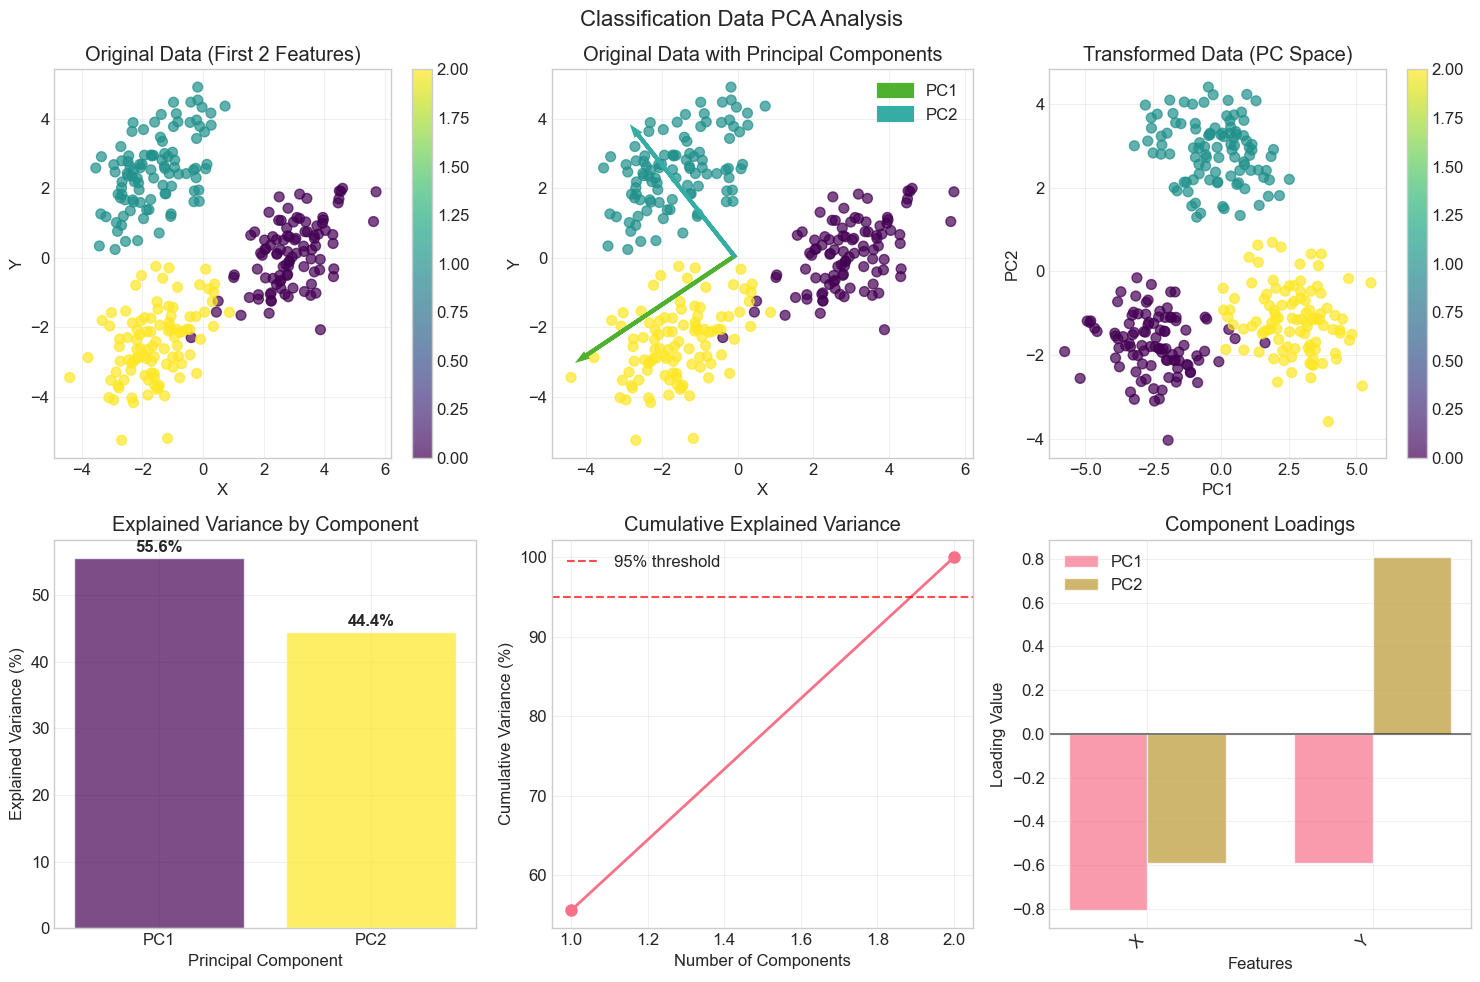

   PCA helps separate classes: [0.55558845 0.44441155]


In [50]:
print("\n5. Testing classification data generation:")

X_class, y_class = create_classification_data_pca(
    n_samples=300,
    n_classes=3,
    separation=3.0,
    random_state=101112
)

print(f"   Classification data shape: {X_class.shape}")
print(f"   Classes: {np.unique(y_class)}")
print(f"   Class distribution: {np.bincount(y_class)}")

# Apply PCA
pca_class = PCA(n_components=2)
X_class_pca = pca_class.fit_transform(X_class)

# Visualize with class labels
plot_2d_pca_results(X_class, X_class_pca, pca_class, labels=y_class,
                   title="Classification Data PCA Analysis",
                   feature_names=["X", "Y"])

print(f"   PCA helps separate classes: {pca_class.explained_variance_ratio_}")

### Outlier Impact Analysis


6. Testing outlier impact on PCA:
   Clean data shape: (200, 2)
   Data with outliers shape: (200, 2)


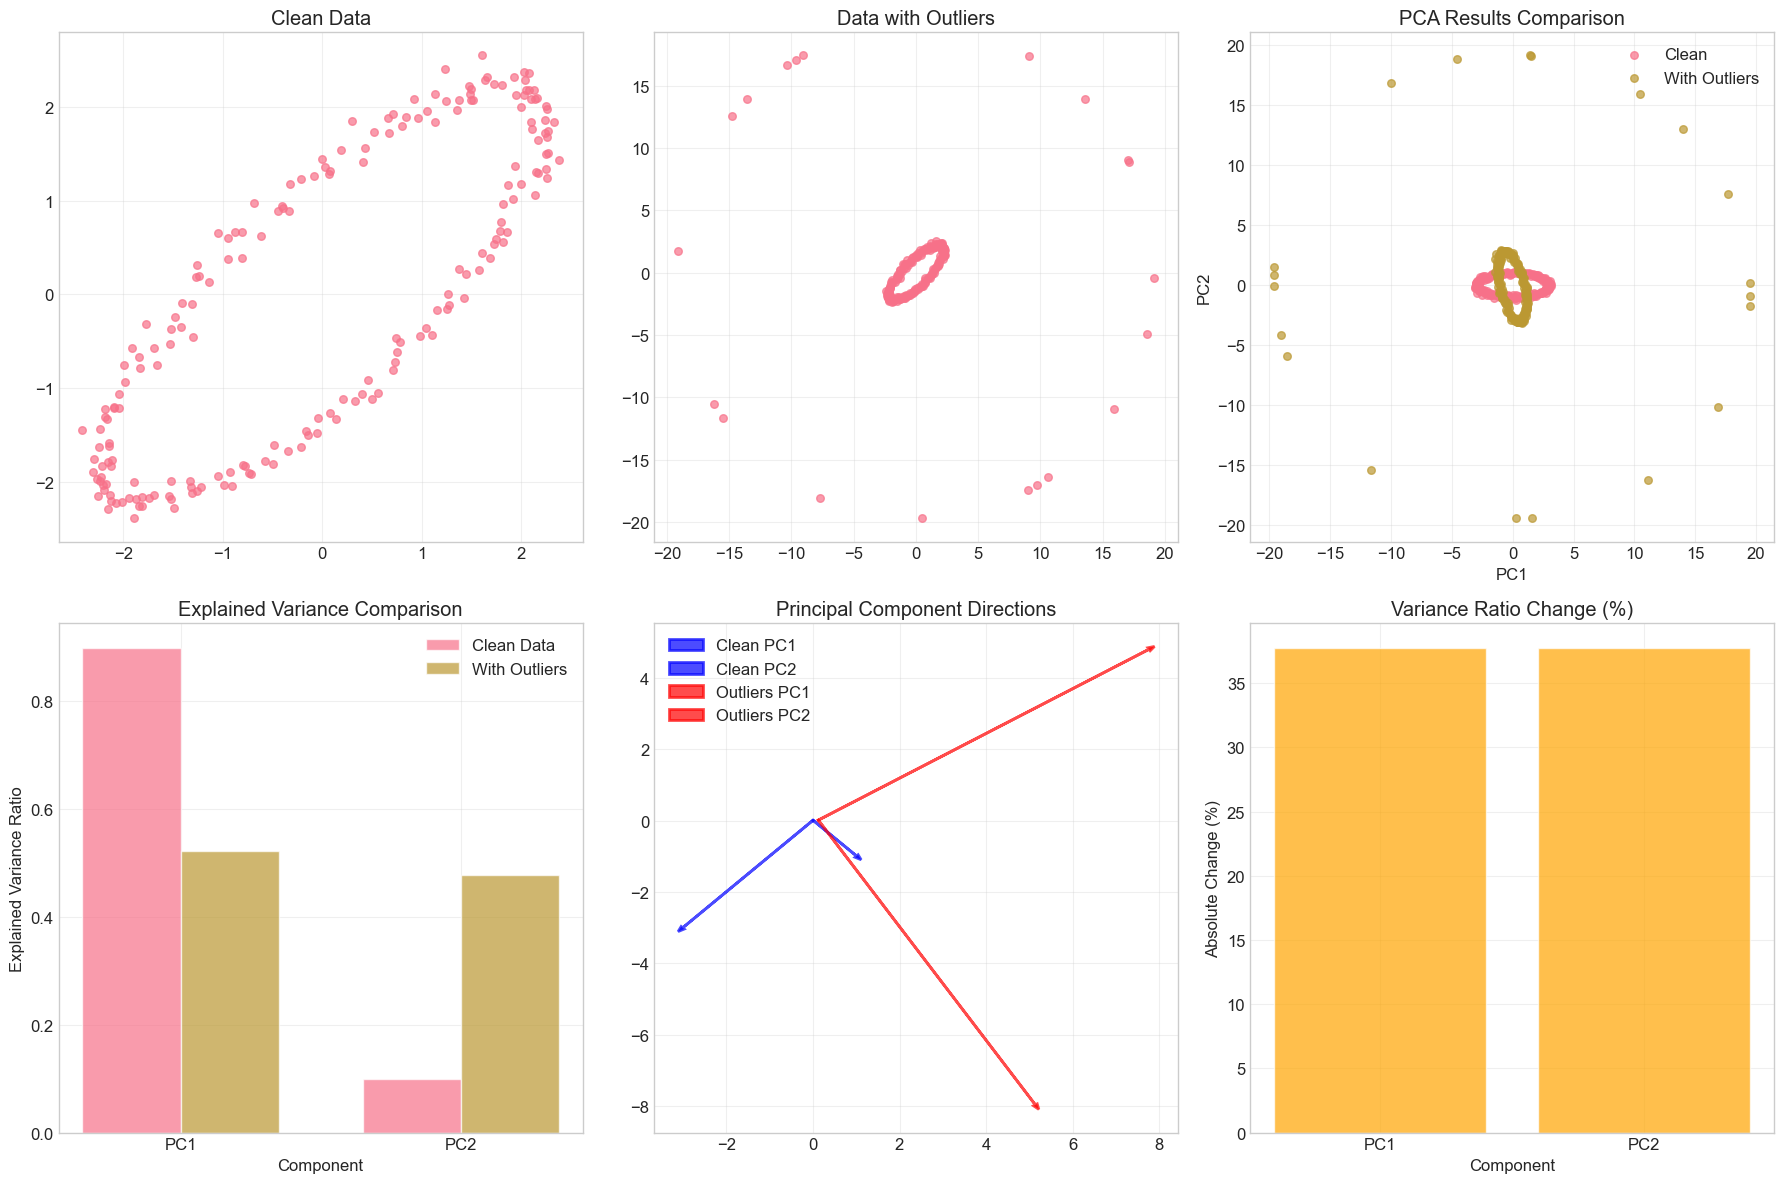

   Impact of outliers on explained variance:
   Clean data: [0.90009305 0.09990695]
   With outliers: [0.52236864 0.47763136]
   Change: [0.3777244 0.3777244]


In [51]:
print("\n6. Testing outlier impact on PCA:")

# Generate clean data
X_clean = generate_elliptical_data(200, random_state=42)

# Add outliers
X_with_outliers = add_outliers(X_clean, outlier_fraction=0.1, outlier_factor=4.0, random_state=42)

print(f"   Clean data shape: {X_clean.shape}")
print(f"   Data with outliers shape: {X_with_outliers.shape}")

# Compare PCA results
pca_clean = PCA(n_components=2)
pca_outliers = PCA(n_components=2)

X_clean_pca = pca_clean.fit_transform(X_clean)
X_outliers_pca = pca_outliers.fit_transform(X_with_outliers)

# Create comparison visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Original data comparison
axes[0, 0].scatter(X_clean[:, 0], X_clean[:, 1], alpha=0.7, s=30)
axes[0, 0].set_title('Clean Data')
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].scatter(X_with_outliers[:, 0], X_with_outliers[:, 1], alpha=0.7, s=30)
axes[0, 1].set_title('Data with Outliers')
axes[0, 1].grid(True, alpha=0.3)

# PCA results comparison
axes[0, 2].scatter(X_clean_pca[:, 0], X_clean_pca[:, 1], alpha=0.7, s=30, label='Clean')
axes[0, 2].scatter(X_outliers_pca[:, 0], X_outliers_pca[:, 1], alpha=0.7, s=30, label='With Outliers')
axes[0, 2].set_title('PCA Results Comparison')
axes[0, 2].set_xlabel('PC1')
axes[0, 2].set_ylabel('PC2')
axes[0, 2].legend()
axes[0, 2].grid(True, alpha=0.3)

# Explained variance comparison
components = ['PC1', 'PC2']
x_pos = np.arange(len(components))
width = 0.35

axes[1, 0].bar(x_pos - width/2, pca_clean.explained_variance_ratio_, width,
               label='Clean Data', alpha=0.7)
axes[1, 0].bar(x_pos + width/2, pca_outliers.explained_variance_ratio_, width,
               label='With Outliers', alpha=0.7)
axes[1, 0].set_title('Explained Variance Comparison')
axes[1, 0].set_xlabel('Component')
axes[1, 0].set_ylabel('Explained Variance Ratio')
axes[1, 0].set_xticks(x_pos)
axes[1, 0].set_xticklabels(components)
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Principal component directions comparison
for i, (pca_obj, label, color) in enumerate([(pca_clean, 'Clean', 'blue'),
                                            (pca_outliers, 'Outliers', 'red')]):
    center = pca_obj.mean_
    for j, (component, variance) in enumerate(zip(pca_obj.components_, pca_obj.explained_variance_)):
        scale = np.sqrt(variance) * 2
        axes[1, 1].arrow(center[0], center[1],
                        component[0] * scale, component[1] * scale,
                        head_width=0.1, head_length=0.15,
                        fc=color, ec=color, alpha=0.7,
                        linewidth=2, label=f'{label} PC{j+1}' if j < 2 else "")

axes[1, 1].set_title('Principal Component Directions')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

# Impact analysis
variance_change = np.abs(pca_clean.explained_variance_ratio_ - pca_outliers.explained_variance_ratio_)
axes[1, 2].bar(components, variance_change * 100, alpha=0.7, color='orange')
axes[1, 2].set_title('Variance Ratio Change (%)')
axes[1, 2].set_xlabel('Component')
axes[1, 2].set_ylabel('Absolute Change (%)')
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"   Impact of outliers on explained variance:")
print(f"   Clean data: {pca_clean.explained_variance_ratio_}")
print(f"   With outliers: {pca_outliers.explained_variance_ratio_}")
print(f"   Change: {variance_change}")